# Importing the libraries and dataset

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
train = pd.read_csv('diamond_train.csv')
test = pd.read_csv('diamond_test.csv')

In [4]:
df = train.copy() 

In [5]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87
6,7,0.71,Very Good,F,VS1,61.8,60.0,3017,5.66,5.70,3.51
7,8,0.70,Ideal,F,SI1,61.3,57.0,2288,5.72,5.77,3.52
8,9,0.59,Ideal,D,VS1,60.9,56.0,2175,5.39,5.44,3.30
9,10,0.31,Very Good,G,VVS1,59.8,62.0,761,4.35,4.41,2.62


In [5]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


The dataset contains the prices and other attributes of almost 54,000 diamonds. The columns are as follows:

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

price (dependent variable)

We will use regression methods to model the price according to the different features.

# EDA

In [6]:
df.shape

(43152, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
Id         43152 non-null int64
carat      43152 non-null float64
cut        43152 non-null object
color      43152 non-null object
clarity    43152 non-null object
depth      43152 non-null float64
table      43152 non-null float64
price      43152 non-null int64
x          43152 non-null float64
y          43152 non-null float64
z          43152 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [8]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isnull().any()
#df.isnull().sum()

Id         False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Our target variable is "price"

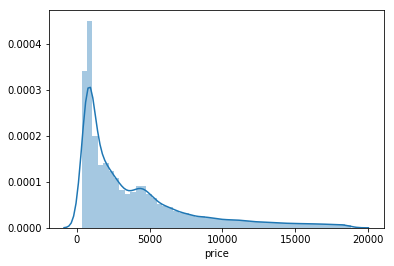

In [8]:
sns.distplot(df['price'])

the target variable is right-skewed => apply a 'log transformation' to make  its distribution more symmetric

In [11]:
#print("The skewness of the Price {}".format(df['price'].skew()))

In [12]:
# Transforming the target variable
#y = np.log(df['price'])
#print("Skewness: {}".format(y.skew()))

In [13]:
#sns.distplot(y)

Text(0.5,1,'Distribution of z')

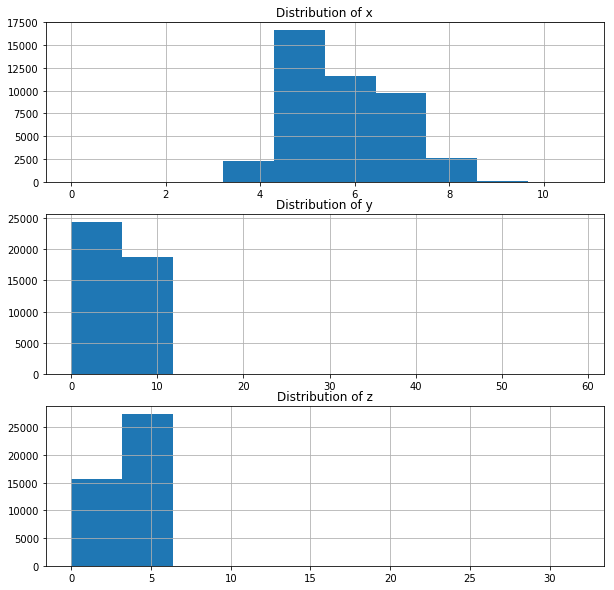

In [14]:
fig, ax = plt.subplots(3, figsize=(10,10))
df['x'].hist(ax=ax[0])
df['y'].hist(ax=ax[1])
df['z'].hist(ax=ax[2])
ax[0].set_title("Distribution of x")
ax[1].set_title("Distribution of y")
ax[2].set_title("Distribution of z")

In [15]:
#delete_dimsionless_values
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

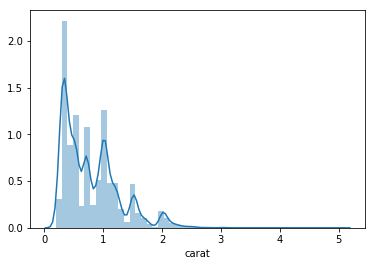

In [16]:
sns.distplot(df['carat'])

In [17]:
df['carat'].skew()

1.1085574097341075

In [18]:
df['carat'] = np.log(df['carat'])
df['carat'].skew()

0.0951613044962432

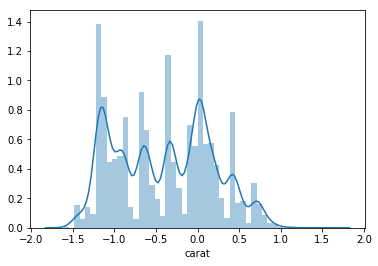

In [19]:
sns.distplot(df['carat'])

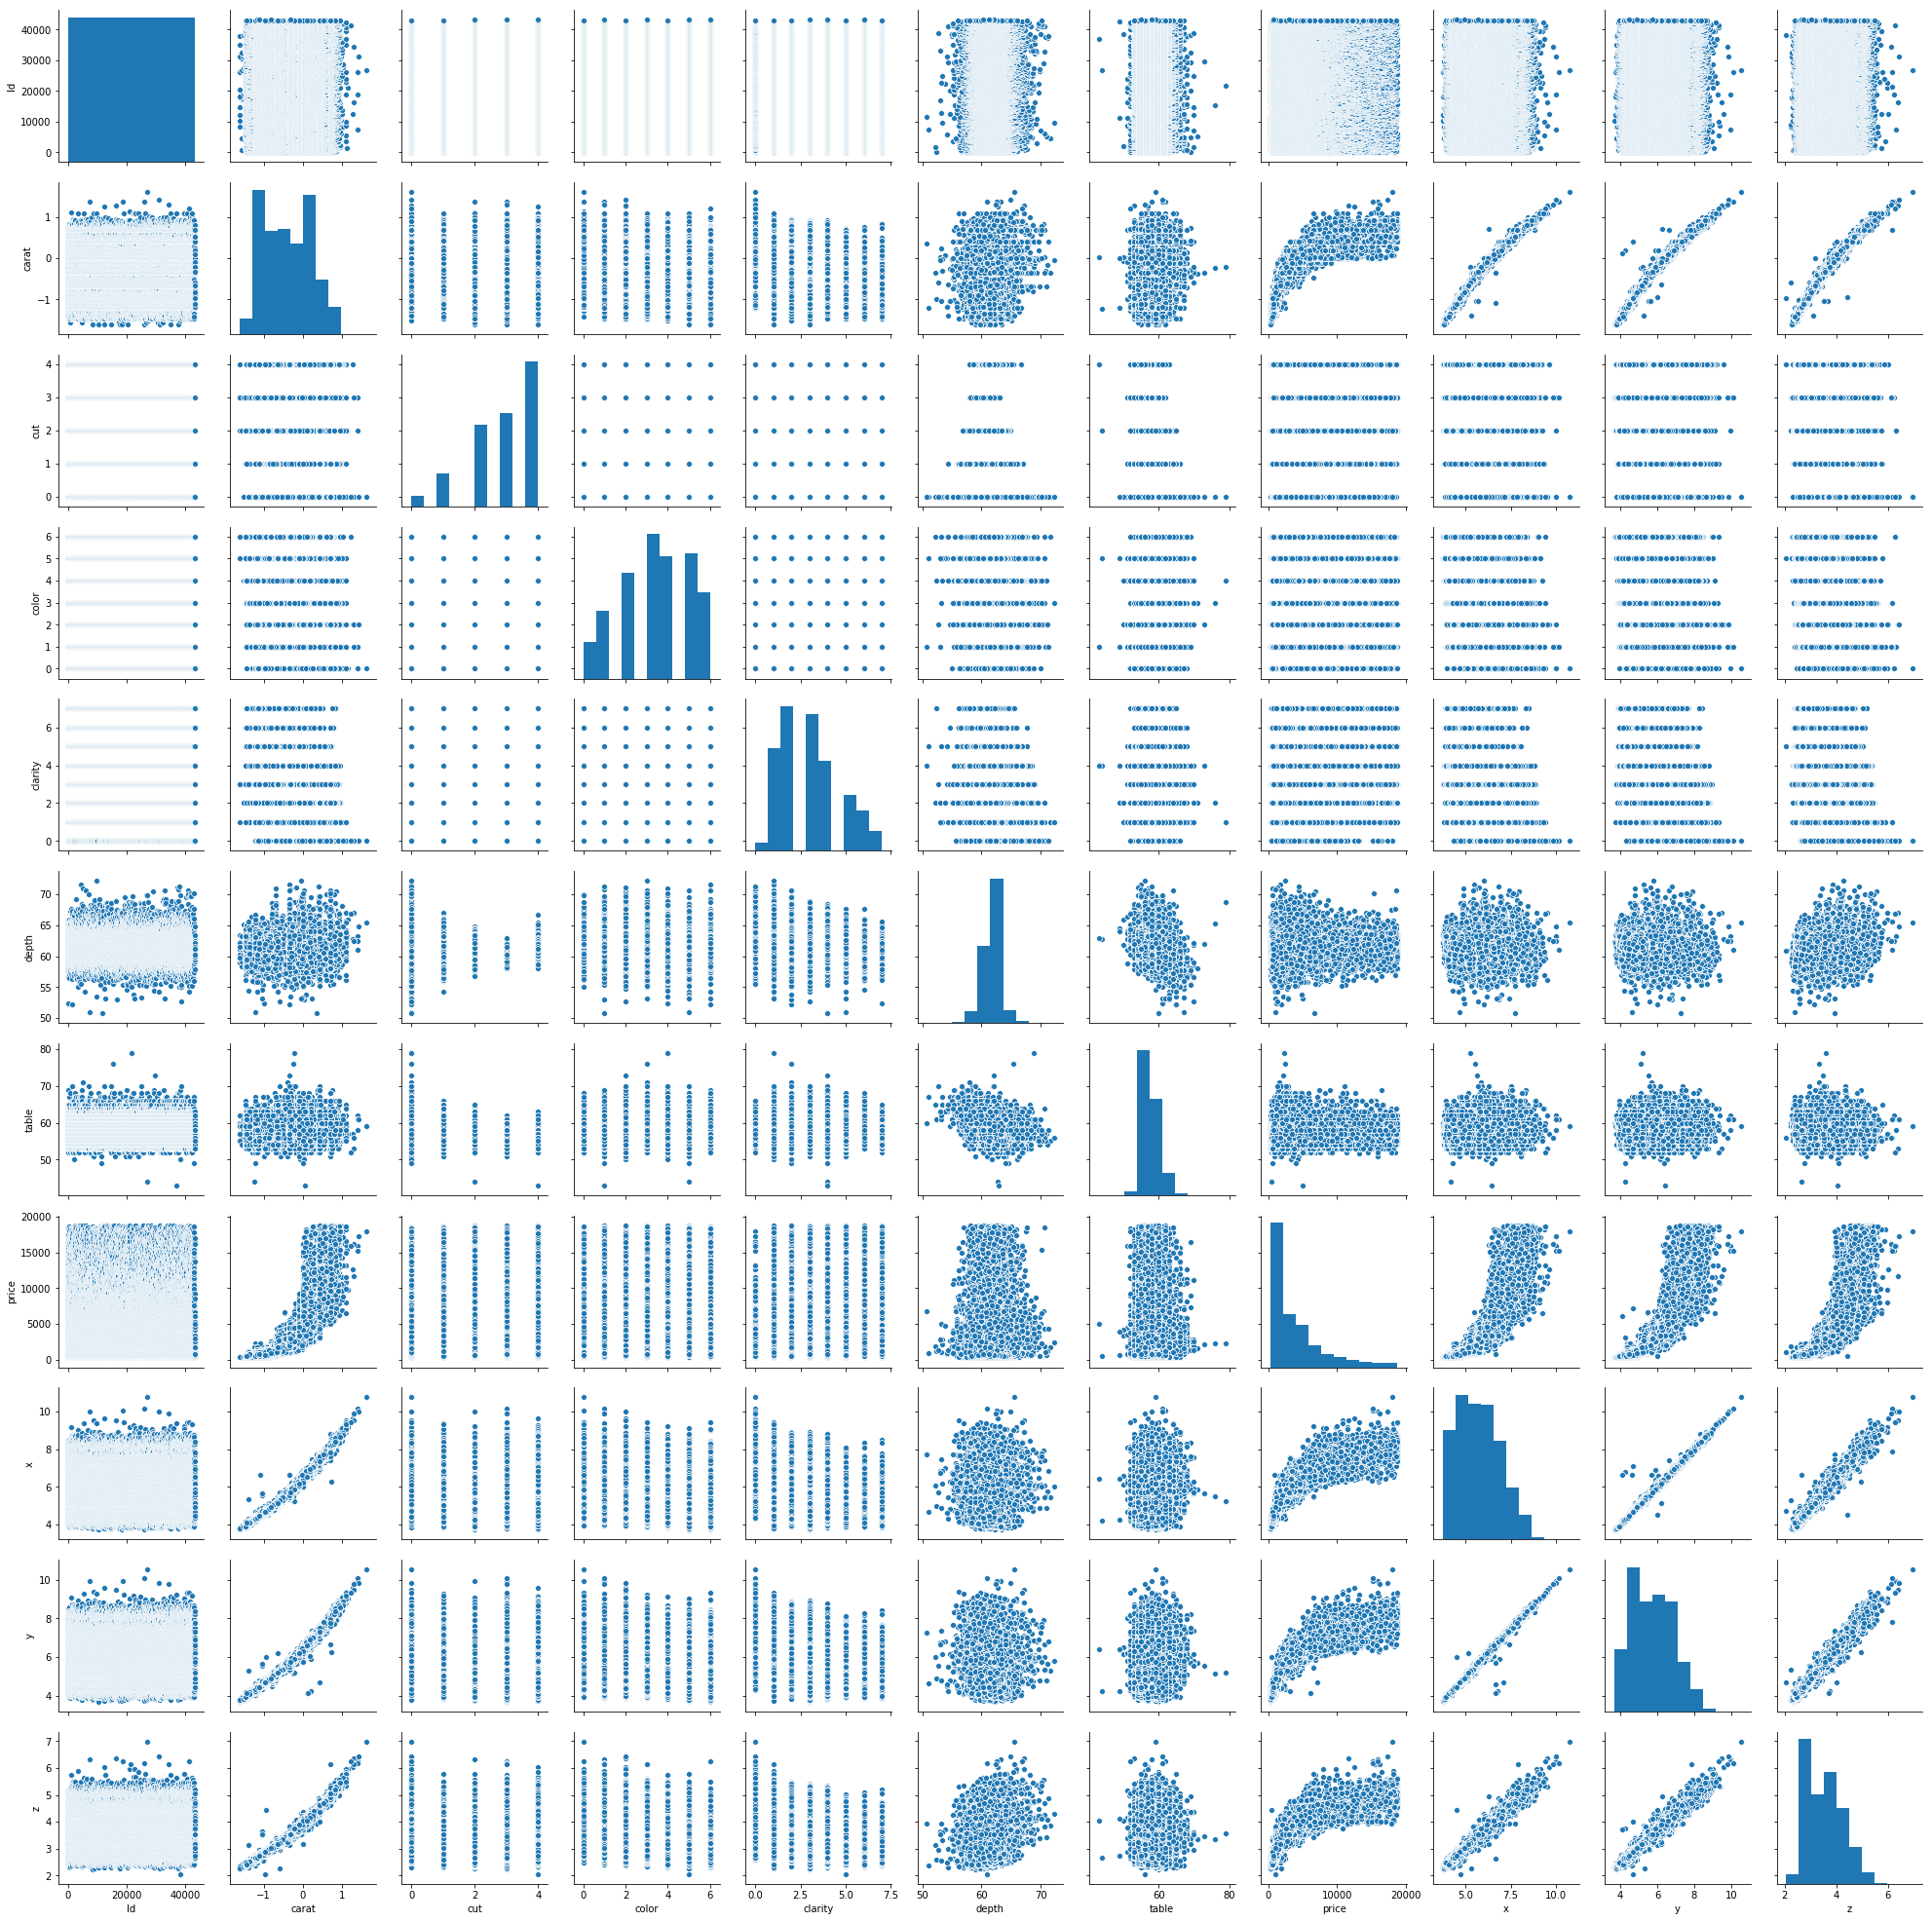

In [48]:
sns.pairplot(df)

In [21]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,21577.642796,-0.395287,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,12456.553482,0.584682,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,1.000000,-1.609438,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10789.500000,-0.916291,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,21578.000000,-0.356675,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,32364.500000,0.039221,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,43152.000000,1.611436,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(43123, 11)

# Feature Selection 

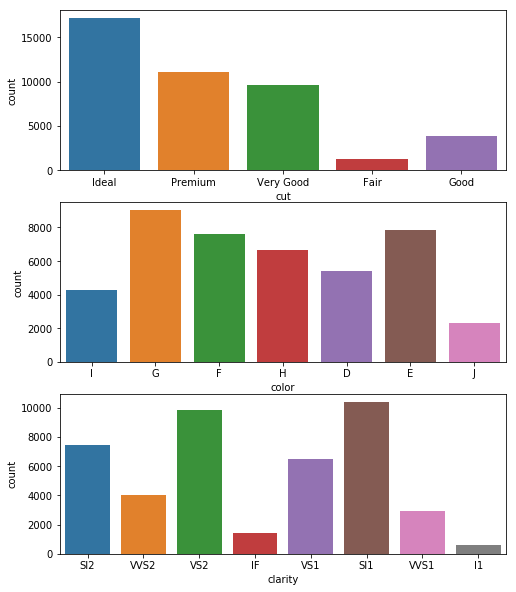

In [10]:
fig, ax = plt.subplots(3, figsize=(8,10))
sns.countplot(df['cut'],ax=ax[0])
sns.countplot(df['color'],ax=ax[1])
sns.countplot(df['clarity'],ax=ax[2])


In [24]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
['I' 'G' 'F' 'H' 'D' 'E' 'J']
['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


In [11]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [25]:
#Data_Encoding = label 
#sklearn
df['cut'] = df['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
df['color'] = df['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
df['clarity'] = df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

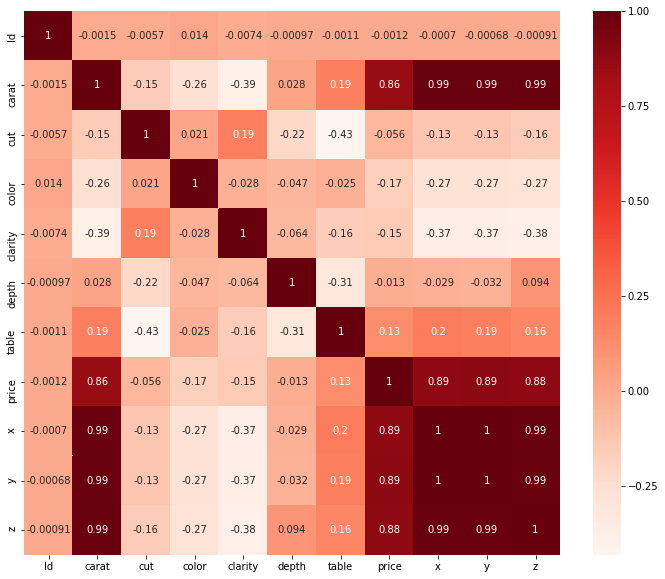

In [26]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap=plt.cm.Reds)
plt.show()

In [27]:
# correlation with output variable 
cor_target = abs(corr_matrix["price"])
cor_target

Id         0.001179
carat      0.855593
cut        0.056359
color      0.171554
clarity    0.147350
depth      0.012773
table      0.128278
price      1.000000
x          0.887148
y          0.888862
z          0.882801
Name: price, dtype: float64

In [28]:
#depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
#df['depth_total'] = 2 * df['z'] / (df['x'] + df['y'])

# Prepare the data for ML

In [29]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [30]:
test['cut'] = test['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
test['color'] = test['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
test['clarity'] = test['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

#test['depth_total'] = 2 * test['z'] / (test['x'] + test['y'])

In [31]:
print(test['carat'].skew())
test['carat'] = np.log(test['carat'])
print("Skewness: {}".format(test['carat'].skew()))

1.1458888480842477
Skewness: 0.100325183835


In [32]:
x = df.drop('price',axis=1)
y = df['price']

# Model Buliding

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import metrics 

In [34]:
linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
r2_linear = linear_model.score(x, y)
r2_linear

0.9050927572726573

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
Id         10788 non-null int64
carat      10788 non-null float64
cut        10788 non-null int64
color      10788 non-null int64
clarity    10788 non-null int64
depth      10788 non-null float64
table      10788 non-null float64
x          10788 non-null float64
y          10788 non-null float64
z          10788 non-null float64
dtypes: float64(6), int64(4)
memory usage: 842.9 KB


In [37]:
#test['depth_total'] = test['depth_total'].fillna(0,inplace=True)

In [38]:
y_pred = linear_model.predict(test)
y_pred

array([  794.3396645 ,  3779.77726809,   313.86600747, ...,
        4779.69128222,  6386.64321376, 12694.70679936])

In [39]:
r3_score = linear_model.score(test, y_pred)
r3_score

1.0

In [40]:
y_pred[:5].round(-2)

array([ 800., 3800.,  300., 3600., 1900.])

In [41]:
y[0:5]

0     4270
1    15164
2      828
3     1577
4     2596
Name: price, dtype: int64

In [42]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
model_RFR.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
RFR_score = model_RFR.score(x, y)
RFR_score

0.9974092667704487

In [44]:
y_RFR = model_RFR.predict(test)

In [45]:
df2 = pd.DataFrame(y_RFR)
df1 = pd.read_csv('diamond_test.csv', usecols=['Id'])
submition = pd.concat([df1, df2], axis=1)

In [47]:
submition.to_csv('final001.csv', index=False)